In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import colorcet

Las variables 
La referencia catastral está ofuscada por lo que no es consultable, solo es válida como identificador de registro.  
La información de longitud-latitud ha sido escalada y desplazada aleatoriamente (manteniendo la relación de posición con el resto de puntos). 
El principal grupo de variables es información sobre los canales de color R-G-B e infrarrojo de las imágenes tomadas por satélite. Hay 11 variables extraídas de cada uno de estos canales, que representan el valor o densidad en cada decil.  
Así, la variable Q_R_4_0_0 representa el valor para el canal Red en el decil 0, la variable Q_G_3_0_8 representa el valor para el canal Green del decil 8 etc. La identificación “Q_NIR…” representa el canal en infrarrojo. 
A continuación, hay 1 variable de área y 4 variables que condensan información de tipo geométrico sobre la parcela/registro.  
El MAXBUILDINGFLOOR se refiere a la altura máxima de los registros colindantes, no al propio registro. El año de construcción también se refiere al entorno. 
Por último, se presenta una variable categórica representativa de la calidad según los datos de catastro (menor valor, menor calidad). 


In [94]:
data = pd.read_csv('Modelar_UH2020.txt', sep ='|')

In [95]:
#data['MAXBUILDINGFLOOR'] = data['MAXBUILDINGFLOOR'].astype('str')

In [96]:
data.dtypes

ID                     object
X                       int64
Y                       int64
Q_R_4_0_0             float64
Q_R_4_0_1             float64
Q_R_4_0_2             float64
Q_R_4_0_3             float64
Q_R_4_0_4             float64
Q_R_4_0_5             float64
Q_R_4_0_6             float64
Q_R_4_0_7             float64
Q_R_4_0_8             float64
Q_R_4_0_9             float64
Q_R_4_1_0             float64
Q_G_3_0_0             float64
Q_G_3_0_1             float64
Q_G_3_0_2             float64
Q_G_3_0_3             float64
Q_G_3_0_4             float64
Q_G_3_0_5             float64
Q_G_3_0_6             float64
Q_G_3_0_7             float64
Q_G_3_0_8             float64
Q_G_3_0_9             float64
Q_G_3_1_0             float64
Q_B_2_0_0             float64
Q_B_2_0_1             float64
Q_B_2_0_2             float64
Q_B_2_0_3             float64
Q_B_2_0_4             float64
Q_B_2_0_5             float64
Q_B_2_0_6             float64
Q_B_2_0_7             float64
Q_B_2_0_8 

In [5]:
data.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
1,F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
2,B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
3,1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4,4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


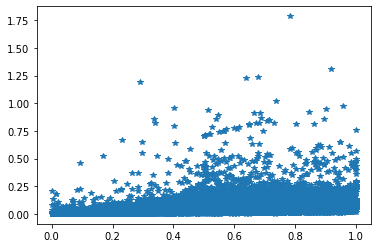

In [101]:
plt.plot(data.GEOM_R1, data.GEOM_R2, '*')

In [4]:
data.shape

(103230, 56)

In [97]:
#data.isnull().sum()

In [6]:
data_clean = data.dropna()

In [7]:
data_sample = data_clean.sample(1000)

In [17]:
data_sample.reset_index(drop=True, inplace=True)

In [19]:
data.describe()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,1.032300e+05,1.032300e+05,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103210.000000
mean,2.208858e+09,1.655955e+08,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,...,2328.363095,2738.622278,7748.293927,441.123610,0.563343,0.062482,0.061855,1.074327,1972.552436,3.766709
std,2.751723e+07,2.040199e+05,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,...,295.852549,365.812714,2795.775635,1869.705189,0.174141,0.042849,0.042295,0.541156,22.335987,2.944896
min,2.120751e+09,1.650957e+08,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,...,1861.006226,2172.992676,4085.049076,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000
25%,2.194235e+09,1.654515e+08,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,...,2126.002441,2478.998193,6051.309064,97.477454,0.455183,0.038255,0.038153,0.801352,1960.000000,1.000000
50%,2.205985e+09,1.655907e+08,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,...,2313.999268,2688.000000,6798.207198,171.554907,0.536336,0.055802,0.055036,0.997175,1972.000000,4.000000
75%,2.224105e+09,1.657138e+08,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,...,2491.004199,2940.996704,8033.479864,343.563671,0.674723,0.078477,0.078064,1.223456,1989.000000,5.000000
max,2.287300e+09,1.665046e+08,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,...,3750.997559,4614.998535,15848.608811,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000


In [20]:
data.CLASE.unique()

array(['RESIDENTIAL', 'INDUSTRIAL', 'PUBLIC', 'OFFICE', 'OTHER', 'RETAIL',
       'AGRICULTURE'], dtype=object)

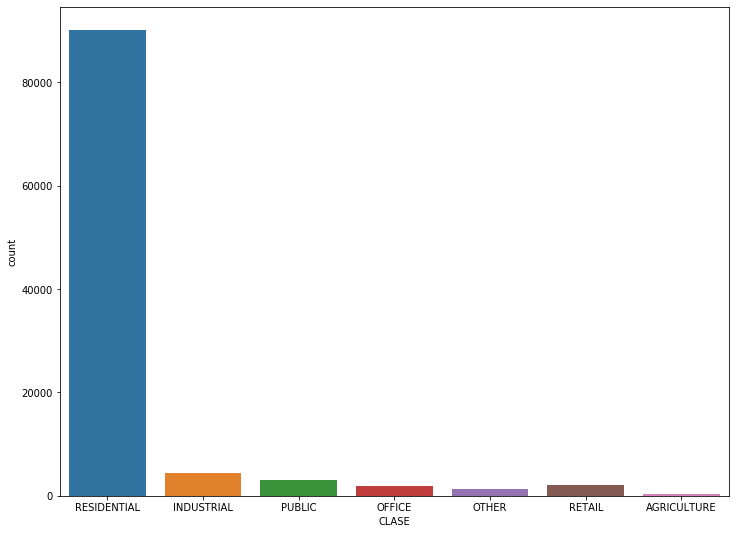

In [26]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.countplot(data['CLASE'])

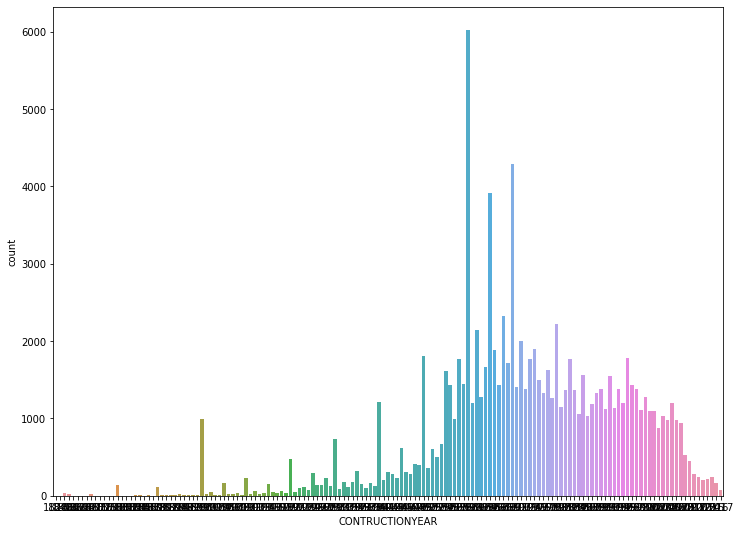

In [28]:
sns.countplot(data['CONTRUCTIONYEAR'])

In [ ]:
df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)


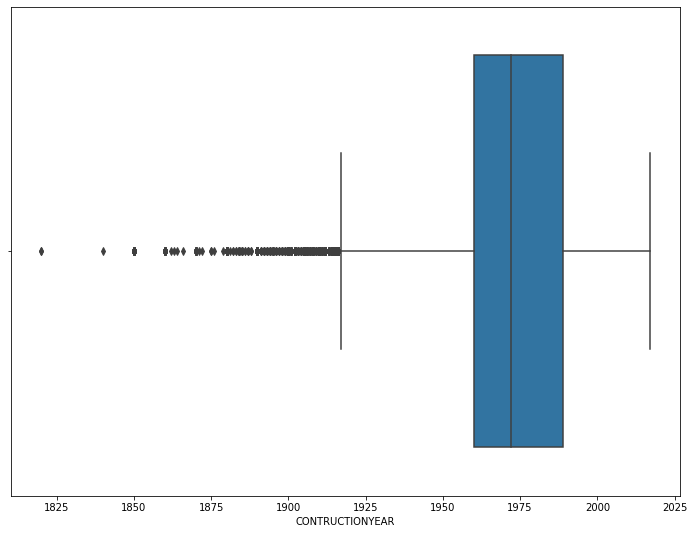

In [29]:
sns.boxplot(data.CONTRUCTIONYEAR)

In [ ]:
div = (data.CONTRUCTIONYEAR.max() - data.CONTRUCTIONYEAR.min())

In [33]:
sin_time = np.sin(2*np.pi*data.CONTRUCTIONYEAR / 10)

In [34]:
cos_time = np.cos(2*np.pi*data.CONTRUCTIONYEAR / 10)

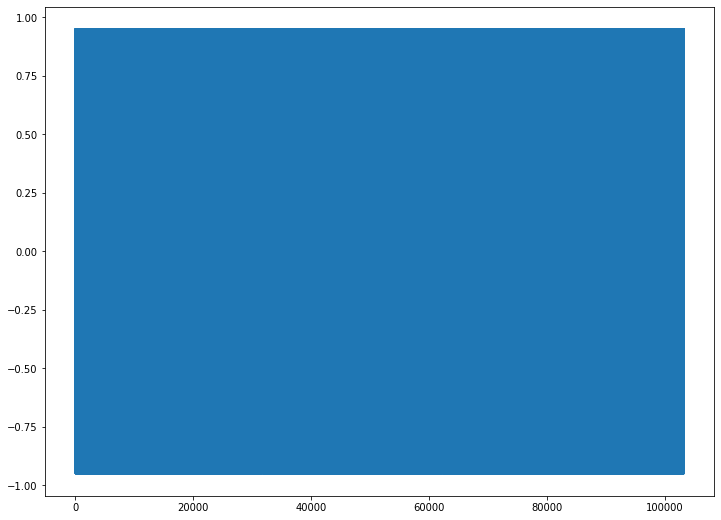

In [35]:
plt.plot(sin_time)

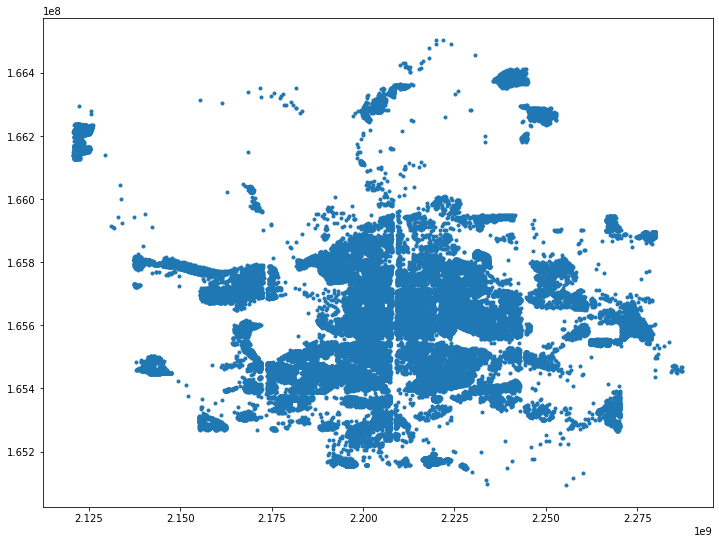

In [38]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(data.X, data.Y, '.')

(array([90173.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         4486.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         2976.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1828.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1332.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2092.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   323.]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 <a list of 50 Patch objects>)

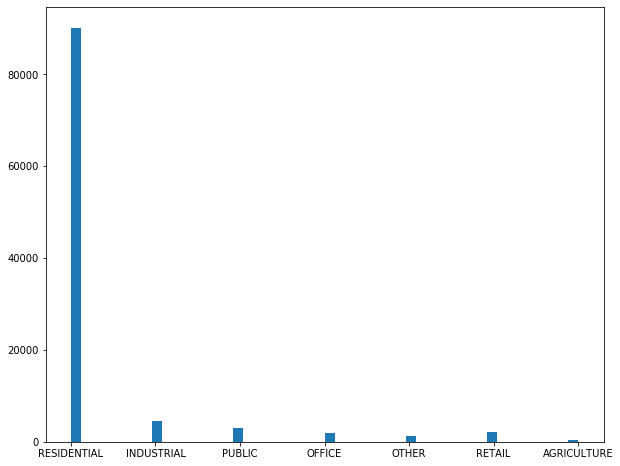

In [132]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.hist(data_clean.iloc[:,55], bins=50)
#sns.countplot(data_clean.iloc[:, 10], hue=data_clean['CLASE'], orient='h')

In [73]:
#plt.hist(data_clean.iloc[:,10], bins = 50)

In [72]:
#sns.countplot(data_clean.iloc[:, 10])

In [133]:
##### variables que se distribuyen "raro": 
# 3 , 13, 14 (rarísimo), 15 (casi normal pero algo asimétrico),
# 23 (casi normal pero algo asimétrico), 24, 25,
# 26 (asimétrica a tope), 27, 28, 30 (muy centrada, aunque así hay más)
# 31 (parecida a 30), 32 (igual q 31, 30), 33 (asimétrica con algunos outliers)
# 34 (parecida a 33), 35 (bastante asimétrica con outliers claros), 
# 36 (solo tiene valores en una franja concreta a excepción de unos pocos outliers)
# 38 (mucha asimetría), 39 (igual), 40 (igual), 41 (igual), 42 (igual), 43 (igual)
# 44 (igual), 45 (igual), 46 (rarísima, échale un ojo tú mismo),  
# 47 (casi todos los valores cerca del 0, algunos valores a tomar x culo)
# 49 (parecida a 47, pero el rango es menor), 50 (igual q 49)
# 51 (igual que 49 y 50 pero algo mayor el rango), 
# 52 (claramente entre los años 50 y 2000 se construyen la mayoría de las casas)
# 53 (me parece claramente categórica, dime tu como lo ves )
# 54 (claramente categórica; las clases B, A y C poco presentes)
# OBJ: 55 (una asimetría brutal la verdad..., pillar x ejemplo la clase agriculture va a ser muy complicado).


In [82]:
#data_clean.iloc[:, 14].describe()

In [8]:
df_dummies = pd.get_dummies(data_clean, columns = data_clean.columns[[53, 54]])

In [9]:
df_dummies.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,CADASTRALQUALITYID_3,CADASTRALQUALITYID_4,CADASTRALQUALITYID_5,CADASTRALQUALITYID_6,CADASTRALQUALITYID_7,CADASTRALQUALITYID_8,CADASTRALQUALITYID_9,CADASTRALQUALITYID_A,CADASTRALQUALITYID_B,CADASTRALQUALITYID_C
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,0,0,0,0,0,0,0,0,0,0
1,F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,0,0,0,0,0,1,0,0,0,0
2,B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,0,0,1,0,0,0,0,0,0,0
3,1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,0,0,0,0,0,0,0,0,0,0
4,4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,0,0,0,1,0,0,0,0,0,0


# variables geograficas

In [76]:
import numpy as np

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

In [55]:
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [7]:
xs, ys = data.X.values, data.Y.values

In [33]:
origin = (data.X.mean(), data.Y.mean())

In [34]:
points = []
for x, y in zip(xs, ys):
    points.append((x,y))

In [73]:
rotated_x, rotated_y = [], []

for p in points:

    res = rotate(origin, p, math.radians(90))
    rotated_x.append(res[0])
    rotated_y.append(res[1])

In [86]:
rotated=rotate(points, origin, degrees=15)

In [87]:
#rotated = np.rot90(points)

In [88]:
x_rotated = [a[0] for a in rotated]
y_rotated = [a[1] for a in rotated]

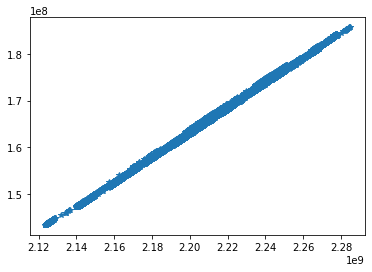

In [89]:
plt.plot(x_rotated, y_rotated, '*')

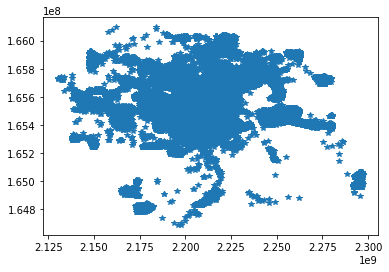

In [72]:
plt.plot(rotated_x, rotated_y, '*')

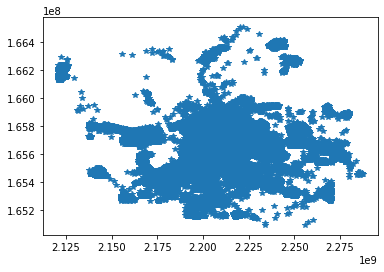

In [32]:
plt.plot(data.X, data.Y, '*')

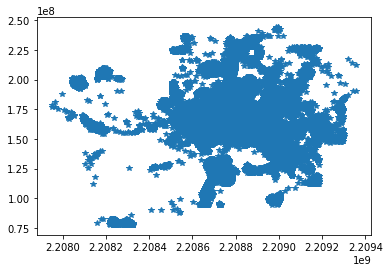

In [81]:
plt.plot(x_rotated, y_rotated, '*')